<a href="https://colab.research.google.com/github/RRaakha/RRaakha/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import The Data**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Explore The Data**

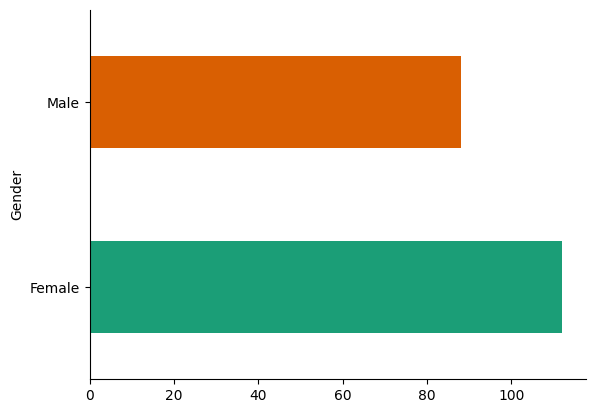

In [4]:
from matplotlib import pyplot as plt #To see the distribution of age category
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.describe() #To view the statistics of the data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Preprocess The Data**

In [9]:
x = df[['Age', 'Spending Score (1-100)']].values #To pick the features

In [10]:
from sklearn.preprocessing import StandardScaler #To preprocess the data
scale = StandardScaler()
scale.fit(x)

StandardScaler()

In [11]:
scale.mean_

array([38.85, 50.2 ])

In [12]:
scale.scale_

array([13.93404105, 25.75888196])

In [13]:
x_scaled = scale.transform(x)

In [14]:
x_scaled.mean(axis = 0)

array([-1.02140518e-16, -1.46549439e-16])

In [15]:
x_scaled.std(axis = 0)

array([1., 1.])

**The Elbow Method**

In [16]:
from sklearn.cluster import KMeans
import numpy as np #To get the optimal K
inertia = []
for i in np.arange(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

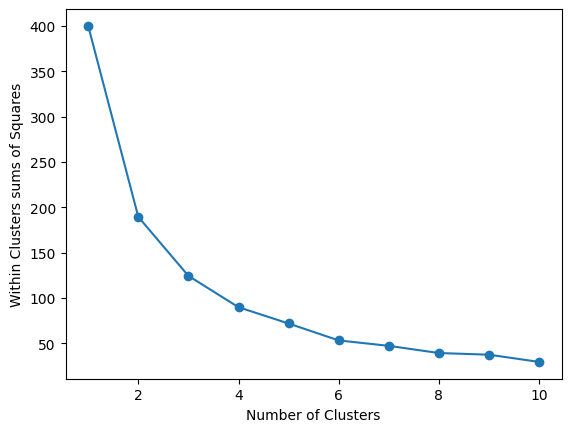

In [17]:
plt.plot(np.arange(1,11), inertia, marker='o') #To plot the inertia
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters sums of Squares')
plt.show()

In [26]:
model= KMeans(n_clusters = 5) #To fit the data into km
model.fit(x_scaled)
y_pred = model.predict(x_scaled)
print(y_pred)

[1 3 1 3 1 3 0 3 0 3 2 3 0 3 0 3 1 3 0 3 1 3 0 3 0 3 4 3 0 3 0 3 0 3 0 3 0
 3 0 3 2 3 4 3 0 3 4 1 1 1 4 3 1 2 4 4 4 2 1 4 2 1 2 4 2 1 4 2 1 1 2 4 2 2
 2 1 4 4 1 4 2 4 2 4 1 4 4 1 3 4 2 1 4 4 1 1 4 1 4 1 1 4 2 1 4 1 2 4 2 2 2
 1 4 1 1 1 2 4 4 4 1 4 4 3 1 3 4 3 0 3 0 3 1 3 1 3 0 3 1 3 0 3 1 3 1 3 4 3
 0 3 0 3 0 3 0 3 0 3 0 3 4 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 4
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


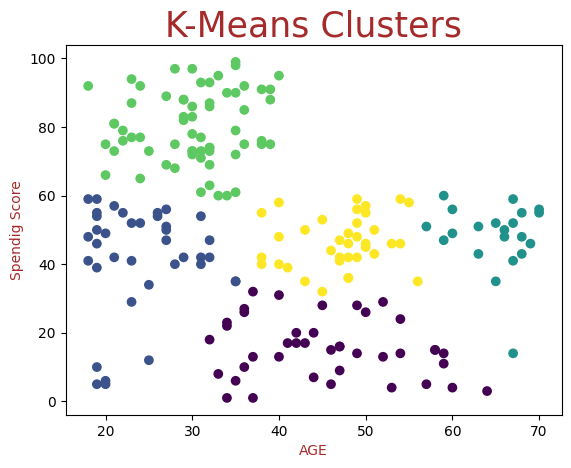

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y_pred)  #To visualize result
plt.title('K-Means Clusters', color = 'brown',size=25)
plt.xlabel('AGE',color = 'brown')
plt.ylabel('Spendig Score',color = 'brown');

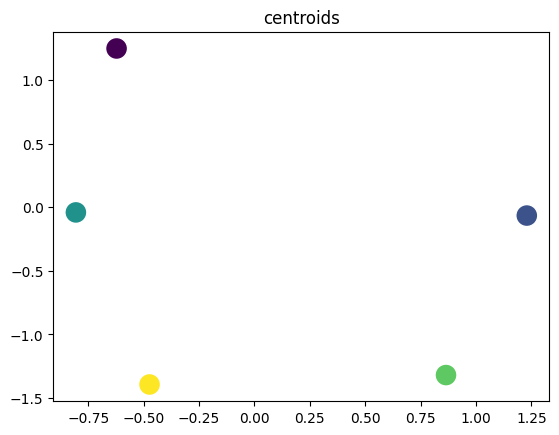

In [24]:
plt.scatter(model.cluster_centers_[:,0],   #To identify the centroids
            model.cluster_centers_[:,1],
           marker = 'o',
           s=250,
           c=[0,1,2,3,4],
           edgecolors='w')
plt.title('centroids')
plt.show()